# Artificial Neural Networks and Deep Learning

---

## Homework 2: Preprocessing
This notebook is meant to pre-process the dataset.

## ⚙️ Import Libraries

In [2]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tfk.__version__}")
print(f"GPU devices: {len(tf.config.list_physical_devices('GPU'))}")

TensorFlow version: 2.18.0
Keras version: 3.6.0
GPU devices: 0


## ⏳ Load the Data

In [3]:
data = np.load("mars_for_students.npz")

training_set = data["training_set"]
X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

print(f"Training X shape: {X_train.shape}")
print(f"Training y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")

Training X shape: (2615, 64, 128)
Training y shape: (2615, 64, 128)
Test X shape: (10022, 64, 128)


### Inspect *X_train* and *y_train* sets

[ 860 1294 1130 1095 1638 2169  466 1238  330 1482]


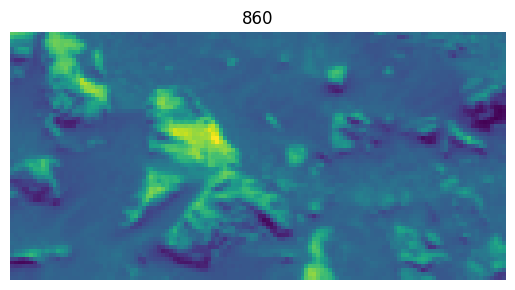

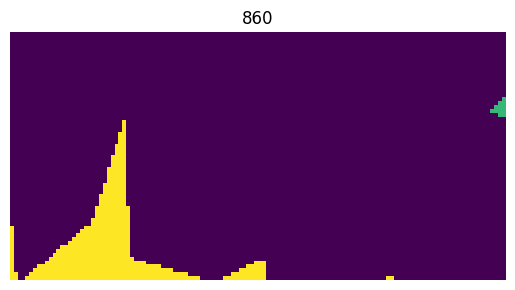

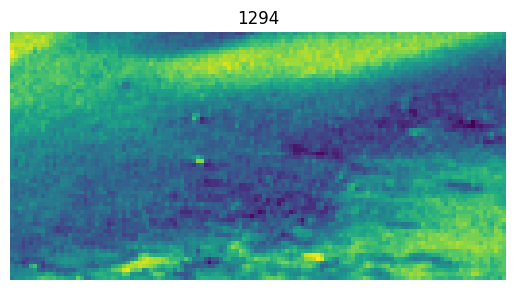

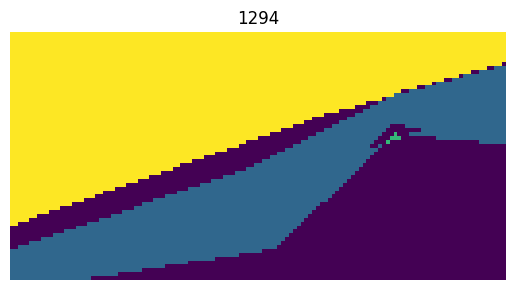

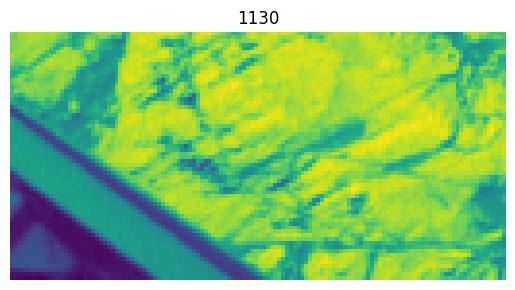

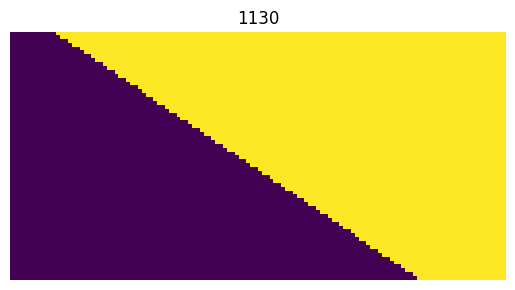

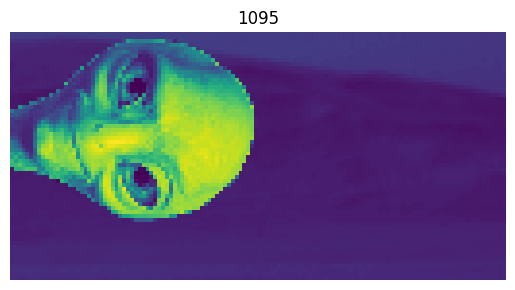

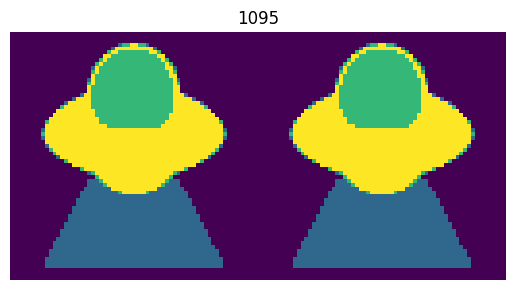

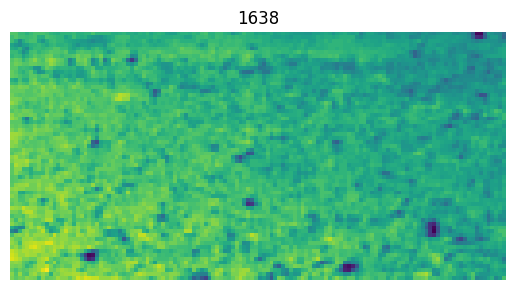

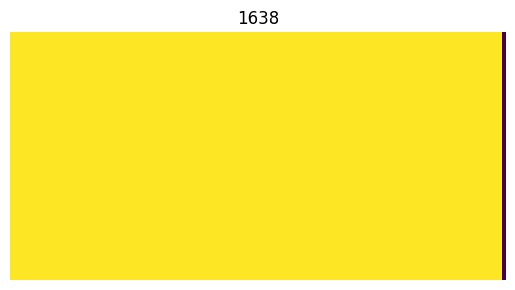

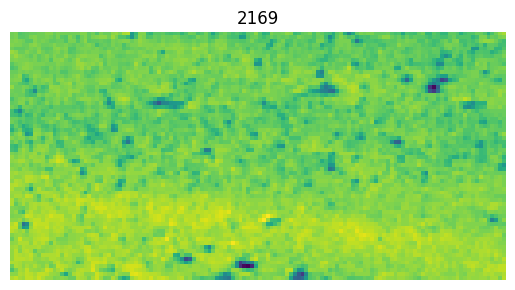

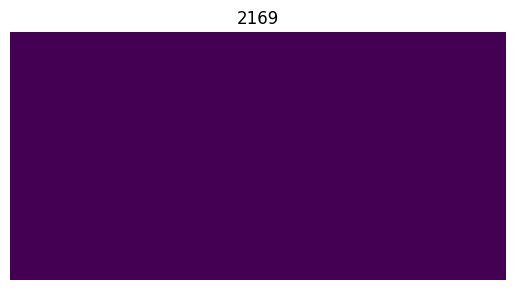

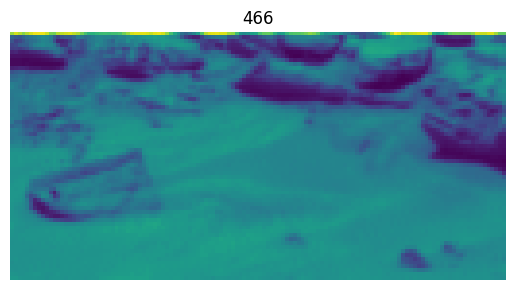

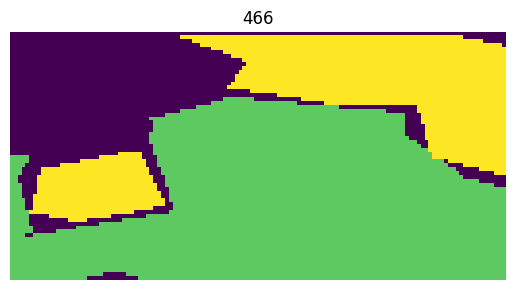

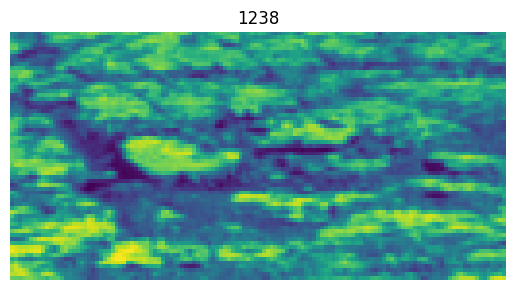

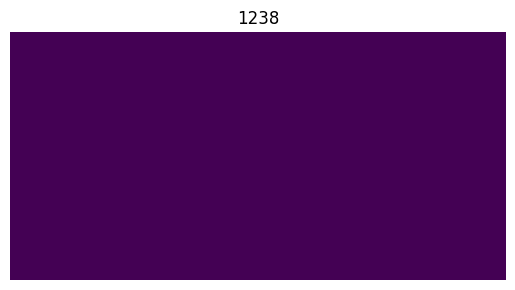

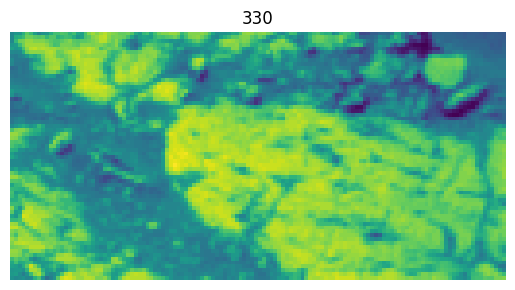

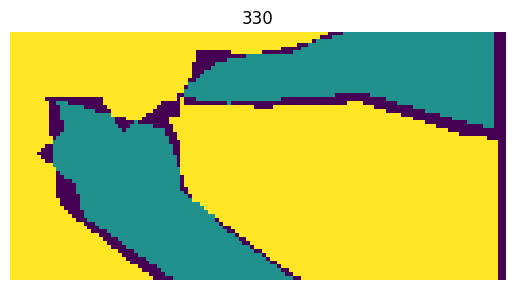

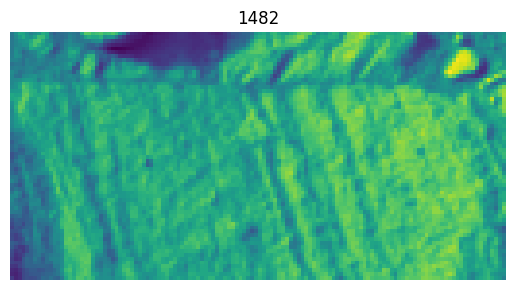

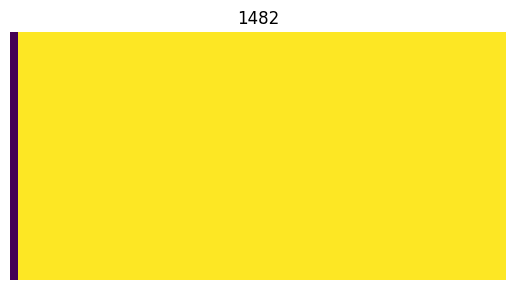

In [4]:
# Create a random index to display every time a different set of images
X_train_size = X_train.shape[0]
random_indices = np.random.randint(0, X_train_size, size = 10)
print(random_indices)

# Plot the image
for index in random_indices:
    plt.imshow(X_train[index])
    plt.title(index)
    plt.axis('off')
    plt.show()
    
    plt.imshow(y_train[index])
    plt.title(index)
    plt.axis('off')
    plt.show()

From the training set, we can understand that **X_train** contains the satellitar images taken from Mars surface, while the **y_train** contains the segmentation masks for the corresponding image.

## Remove the Outliers
Analysing the X_train and y_train sets, it is possible to notice some outliers. For example, there are some pictures (e.g. the one with index 62) contains the picture of an alien. 

By understanding both the pictures and the masks, the masks seems to be the same even if the alien picture is flipped. So we can scan all the masks that are the same of picture 62 and then remove them from the dataset.

In [5]:
# This function establish if image1 and image2 are the same images, pixel-wise.
def are_same(image1, image2):
    if image1.shape != image2.shape:
        print("ERROR: The images are not the same size.")
        return False
    return np.array_equal(image1, image2)

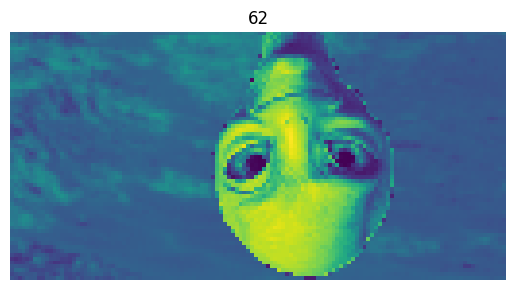

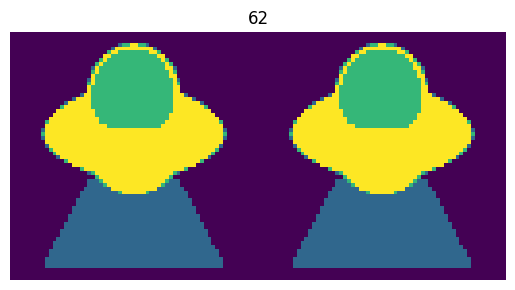

In [6]:
# Show the first picture of an alien
first_alien_index = 62
alien_indices = []
alien_indices.append(first_alien_index)

plt.imshow(X_train[first_alien_index])
plt.title(first_alien_index)
plt.axis('off')
plt.show()

plt.imshow(y_train[first_alien_index])
plt.title(first_alien_index)
plt.axis('off')
plt.show()

In [7]:
# Detect all the images with the same masks as of the first alien
for i in range(len(X_train)):
    if i != first_alien_index and are_same(y_train[first_alien_index], y_train[i]):
        alien_indices.append(i)

print(f"{len(alien_indices)} images have the same mask of the first alien picture:")
print(alien_indices)

110 images have the same mask of the first alien picture:
[62, 79, 125, 139, 142, 147, 152, 156, 170, 210, 217, 266, 289, 299, 313, 339, 348, 365, 412, 417, 426, 450, 461, 536, 552, 669, 675, 741, 744, 747, 799, 802, 808, 820, 821, 849, 863, 890, 909, 942, 971, 1005, 1057, 1079, 1082, 1092, 1095, 1106, 1119, 1125, 1177, 1194, 1224, 1247, 1248, 1258, 1261, 1262, 1306, 1324, 1365, 1370, 1443, 1449, 1508, 1509, 1519, 1551, 1584, 1588, 1628, 1637, 1693, 1736, 1767, 1768, 1782, 1813, 1816, 1834, 1889, 1925, 1942, 1975, 1979, 2000, 2002, 2086, 2096, 2110, 2111, 2151, 2161, 2222, 2235, 2239, 2242, 2301, 2307, 2350, 2361, 2365, 2372, 2414, 2453, 2522, 2535, 2561, 2609, 2614]


In [8]:
# Delete from X_train and y_train all the images with index in alien_indices
X_train = np.delete(X_train, alien_indices, axis=0)
y_train = np.delete(y_train, alien_indices, axis=0)

print("Shape of X_train without aliens: ", X_train.shape)
print("Shape of y_train without aliens: ", y_train.shape)

Shape of X_train without aliens:  (2505, 64, 128)
Shape of y_train without aliens:  (2505, 64, 128)


In [9]:
# Check for duplicated images (that have same image and mask)
unique_images_indices = []
duplicated_images_indices = []

for i in range(len(X_train)):
    is_image_unique = True

    j = 0
    while j < i and is_image_unique:
        if are_same(X_train[i], X_train[j]) and y_train[i] == y_train[j]:
            print(f"Image at index {i} already exists at index {j} with same label {y[i]}.")
            is_image_unique = False
        j += 1

    if is_image_unique:
        unique_images_indices.append(i)
    else:
        duplicated_images_indices.append(i)

if(duplicated_images_indices == []):
    print("There are no duplicates")

There are no duplicates


We check if there are duplicated images, but we did not find any.
We save the cleaned dataset. 

In [10]:
# Check the number of occurrences of each label
unique, counts = np.unique(y_train, return_counts=True)

print('Number of occurrences of each label: ')
for i in range(unique.size):
    print(f'Label {unique[i]}: {counts[i]}')

Number of occurrences of each label: 
Label 0.0: 4988826
Label 1.0: 6957538
Label 2.0: 4776810
Label 3.0: 3770823
Label 4.0: 26963


As we can see the dataset is higly unbalanced.

In [11]:
# Save the clean dataset (without outliers)
np.savez_compressed('clean_dataset', images=X_train, labels=y_train, test_set=X_test)